
# 🧪 Práctica: Preprocesamiento de Imágenes Médicas

En esta práctica, trabajarás con imágenes médicas 3D en formato `.nii.gz`. Realizarás algunas operaciones comunes de preprocesamiento como:

- Visualización de cortes axiales
- Cambios de resolución (resampling)
- Recortes y padding
- Filtros (Gaussiano, Sobel, Laplaciano)
- Normalización de intensidades

Completa las celdas marcadas con `# TODO` o responde a las preguntas dentro del notebook.


In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, gaussian_filter, sobel, laplace, binary_dilation, binary_erosion, binary_closing, binary_opening
from sklearn.preprocessing import MinMaxScaler, StandardScaler


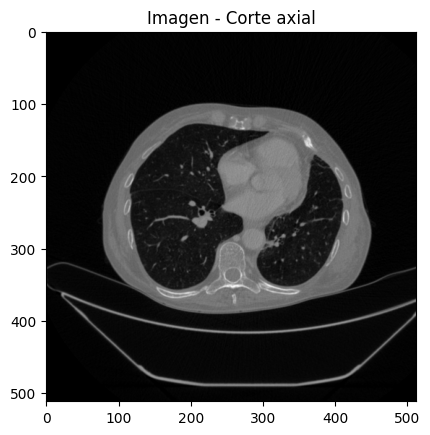

In [3]:
path_to_img = './inputs/image.nii.gz'  # <-- reemplaza esto
data_nib = nib.load(path_to_img)
image = data_nib.get_fdata()

# Rotamos la imagen para visualizarla correctamente
image = np.rot90(image, 1, axes=(0,1))

# Mostramos un corte axial
slice_idx = image.shape[2] // 2
plt.imshow(image[:, :, slice_idx], cmap='gray')
plt.title("Imagen - Corte axial")
plt.show()


Shapes -> Resampled: (256, 256, 362) | Cropped: (100, 100, 725) | Padded: (612, 612, 825)


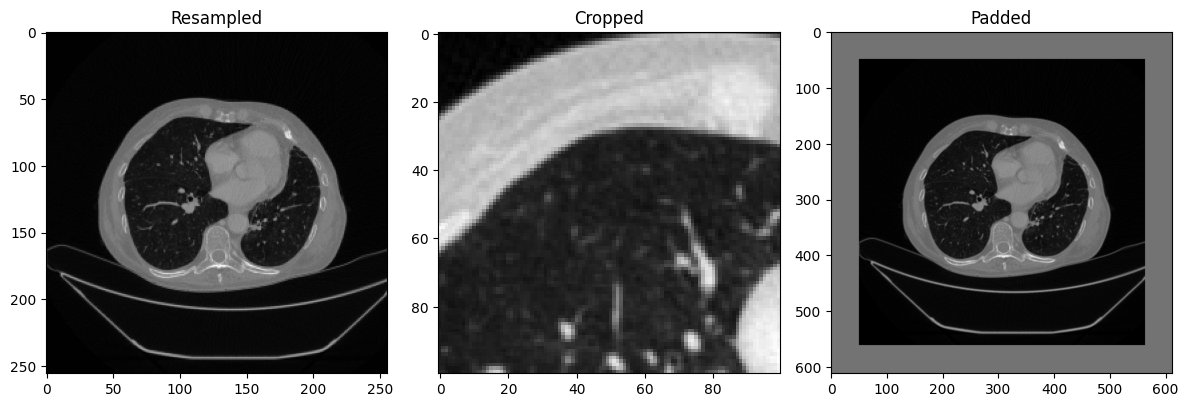

In [4]:
# PREPROCESAMIENTO BÁSICO

# TODO: Ajusta los parámetros de zoom para reducir la imagen más o menos
resampled = zoom(image, (0.5, 0.5, 0.5))

# TODO: Cambia los índices para hacer un recorte diferente
cropped = image[100:200, 150:250, :]

# TODO: Cambia el padding (¿qué pasa si usas 'reflect' en vez de 'constant'?)
padded = np.pad(image, ((50, 50), (50, 50), (50, 50)), mode='constant')

print("Shapes -> Resampled:", resampled.shape, "| Cropped:", cropped.shape, "| Padded:", padded.shape)

# Visualización de las 3 variantes
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(resampled[:, :, resampled.shape[2]//2], cmap='gray')
axs[0].set_title("Resampled")
axs[1].imshow(cropped[:, :, cropped.shape[2]//2], cmap='gray')
axs[1].set_title("Cropped")
axs[2].imshow(padded[:, :, padded.shape[2]//2], cmap='gray')
axs[2].set_title("Padded")
plt.tight_layout()
plt.show()


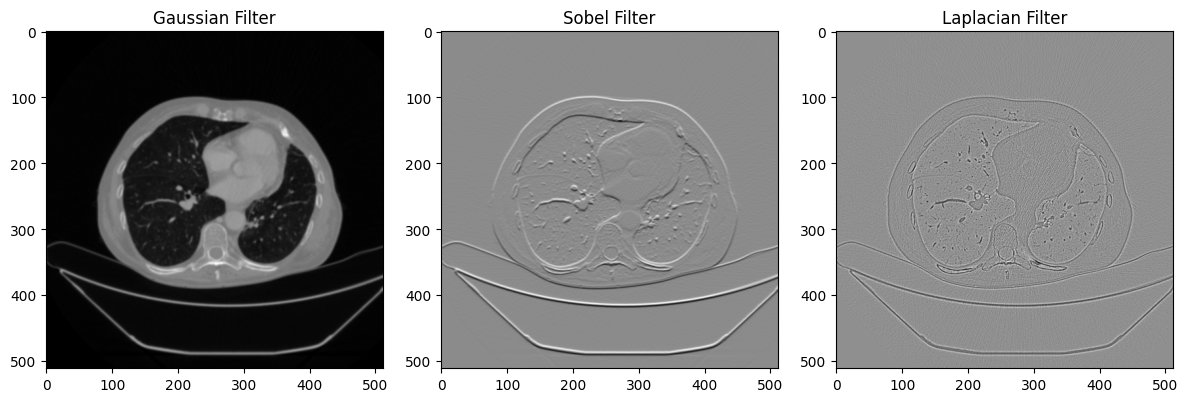

In [5]:
# FILTRADO DE IMÁGENES

# TODO: Aplica un filtro Gaussiano con sigma distinto
gauss = gaussian_filter(image, sigma=1)

# TODO: Prueba con filtros de Sobel (cambia el eje) y Laplaciano
sobel_x = sobel(image, axis=0)
lap = laplace(image)

# Visualización
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(gauss[:, :, gauss.shape[2]//2], cmap='gray')
axs[0].set_title("Gaussian Filter")
axs[1].imshow(sobel_x[:, :, sobel_x.shape[2]//2], cmap='gray')
axs[1].set_title("Sobel Filter")
axs[2].imshow(lap[:, :, lap.shape[2]//2], cmap='gray')
axs[2].set_title("Laplacian Filter")
plt.tight_layout()
plt.show()

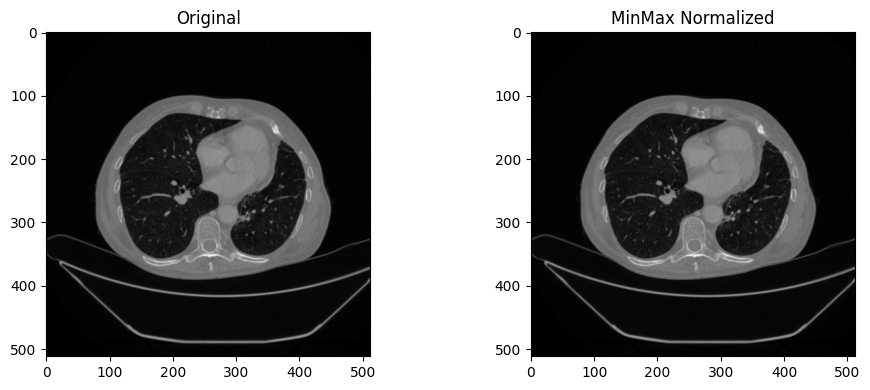

In [7]:
# NORMALIZACIÓN DE INTENSIDADES

# Tomamos una "slice" para ver cómo se transforma
slice_2d = image[:, :, slice_idx]
flat_slice = slice_2d.flatten().reshape(-1, 1)

# Normalización
scaler = MinMaxScaler()
normalized = scaler.fit_transform(flat_slice).reshape(slice_2d.shape)

# Visualización antes y después
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(slice_2d, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(normalized, cmap='gray')
axs[1].set_title("MinMax Normalized")
plt.tight_layout()
plt.show()

# PREGUNTA: ¿Qué cambia con respecto al brillo/contraste?

In [ ]:
# TODO: Implementa una función que realice un preprocesamiento completo:
# - Aplica un recorte
# - Redimensiona (resampling)
# - Aplica filtro Gaussiano
# - Normaliza intensidades

def full_preprocessing(img, crop_slices, zoom_factors, sigma=1):
    # Recorte
    cropped_img = img[crop_slices[0], crop_slices[1], crop_slices[2]]
    # Redimensiona
    resampled_img = zoom(cropped_img, zoom_factors)
    # Filtro Gaussiano
    filtered_img = gaussian_filter(resampled_img, sigma=sigma)
    # Normalización
    flat = filtered_img.flatten().reshape(-1, 1)
    scaler = MinMaxScaler()
    normalized_img = scaler.fit_transform(flat).reshape(filtered_img.shape)
    return normalized_img

# Ejemplo de uso:
crop_slices = (slice(100, 200), slice(150, 250), slice(None))
zoom_factors = (0.5, 0.5, 0.5)
processed = full_preprocessing(image, crop_slices, zoom_factors, sigma=1)
processed

array([[[0.00697239, 0.00588323, 0.00474353, ..., 0.01015053,
         0.00965846, 0.00933308],
        [0.00714787, 0.00669597, 0.00691955, ..., 0.00981228,
         0.00994049, 0.00977854],
        [0.00847125, 0.0085362 , 0.00945862, ..., 0.00965616,
         0.01032667, 0.01060281],
        ...,
        [0.00657171, 0.00740479, 0.00842228, ..., 0.01098485,
         0.01104362, 0.01126078],
        [0.00817211, 0.0080998 , 0.00784383, ..., 0.01032506,
         0.01060226, 0.01103277],
        [0.01133606, 0.00933695, 0.00727175, ..., 0.01070712,
         0.01032949, 0.0106    ]],

       [[0.00671763, 0.00653078, 0.00582752, ..., 0.01050861,
         0.00999806, 0.00962765],
        [0.00676773, 0.00690288, 0.00718355, ..., 0.00984321,
         0.0100939 , 0.01011527],
        [0.00801514, 0.00815185, 0.00893981, ..., 0.00980399,
         0.01049384, 0.01088202],
        ...,
        [0.00713076, 0.00802233, 0.00882651, ..., 0.01106078,
         0.01077884, 0.01074089],
        [0.0